In [1]:
import os
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder




In [2]:
random.seed(0)

In [3]:
## loading the file
health_care = pd.read_csv('../healthcare/train_data.csv', na_values=['NA', 'NaN', '?'])

In [11]:
# Dropping na values for 
#health_care = health_care.dropna()


## Feature engineering

We will add 2 features : 
- Visit number
- New Patient

In [54]:
n = health_care.shape[0]
visits = []
patientid = np.array(health_care['patientid'])
for i in range(n) :
    count = (patientid[:i+1] == patientid[i]).sum()
    visits.append(count)
    
health_care['Visit Number'] = visits
health_care['New Patient'] = (health_care['Visit Number']==1).astype('int32')

## Hot encoded Data

In [4]:
# Function to hot encode the column with name : name for dataframe df
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = f"{name}-{x}"
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True) ## inplace to make changed on the original df

In [5]:
## Pre processing these columns

le_string_columns = [  'Severity of Illness', 'Age' ]
dummies_string_columns = ['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code',  'Type of Admission']
encoder = LabelEncoder()
#ohEncoder = OneHotEncoder()

## label_encoded data
Xe = health_care.drop(['Stay', 'case_id', 'City_Code_Hospital','City_Code_Patient', 'Bed Grade'], axis=1)
Xe['Severity of Illness']= Xe['Severity of Illness'].map({'Minor': 0,  'Moderate': 1,'Extreme': 2})
Xe['Age'] = encoder.fit_transform(Xe['Age'])

ye = health_care['Stay']
ye = encoder.fit_transform(ye)


for column in dummies_string_columns :
    encode_text_dummy(Xe, column)
    

In [6]:
#checking for missing values
Xe.isnull().values.any()

False

## Scaling Hot Encoded Data

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = Xe.values
y = ye
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
for i in range(X_train.shape[1]) :
    X_train[:,i]= scaler.fit_transform(X_train[:,i].reshape(-1, 1))[:,0]
    X_test[:,i] = scaler.transform(X_test[:,i].reshape(-1, 1))[:,0]

# Metrics to use for this dataset

In [8]:
K = 10
def score(y_test, y_pred):
    score = 1-np.mean(np.abs(y_test-y_pred))/K
    return score
    

# Classification models to try :

- Decision trees
- K nearest neighbor
- PCA
- Random Forest


# Decision Trees

In [9]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [19]:
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy')

In [20]:
y_train.shape

(238828,)

In [21]:
y_train

array([2, 2, 3, ..., 1, 2, 3])

In [22]:
y_pred = tree.predict(X_test)

In [23]:
acc = accuracy_score(y_test, y_pred)

In [24]:
acc

0.28600678306745386

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay


In [ ]:
cm = confusion_matrix(y_test, y_pred)

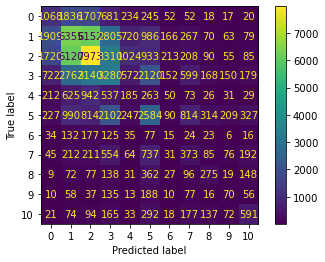

In [26]:
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [27]:
print(score(y_test, y_pred))

0.8472289913327471


In [28]:
kf = KFold(5, shuffle=True)
fold = 1

for train_index, validate_index in kf.split(X,y):
    tree.fit(X[train_index], y[train_index])
    y_test = y[validate_index]
    y_pred = tree.predict(X[validate_index])
    print(f'Accuracy : %.4f' % accuracy_score(y_test, y_pred))
    print(f'Score : %.4f' % score(y_test, y_pred))

Accuracy : 0.2869
Score : 0.8472
Accuracy : 0.2850
Score : 0.8470
Accuracy : 0.2855
Score : 0.8473
Accuracy : 0.2863
Score : 0.8475
Accuracy : 0.2855
Score : 0.8480


In [36]:
tree = DecisionTreeClassifier(criterion='gini')
tree.fit(X_train, y_train)


DecisionTreeClassifier()

In [37]:
y_pred = tree.predict(X_test)


In [38]:
y_pred.shape

(79610,)

In [39]:
y_test.shape

(79610,)

In [40]:
print(accuracy_score(y_test, y_pred))

0.2836201482225851


In [41]:
print(score(y_test, y_pred))

0.8464853661600301


### Adding PCA


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(5)

Xp = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xp, y, test_size=0.25)
for i in range(X_train.shape[1]) :
    X_train[:,i]= scaler.fit_transform(X_train[:,i].reshape(-1, 1))[:,0]
    X_test[:,i] = scaler.transform(X_test[:,i].reshape(-1, 1))[:,0]



In [ ]:
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred))

In [ ]:
print(score(y_test, y_pred,11))

# SVM

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1E10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
for i in range(X_train.shape[1]) :
    X_train[:,i]= scaler.fit_transform(X_train[:,i].reshape(-1, 1))[:,0]
    X_test[:,i] = scaler.transform(X_test[:,i].reshape(-1, 1))[:,0]
    
model.fit(X_train,y_train)

In [ ]:
y_pred = model.predict(X_test)
print(f'Accuracy : %.3f' % accuracy_score(y_test, y_pred))
print(f'Score : %.2f' % score(y_test, y_pred,11))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

# Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

In [59]:
forest = RandomForestClassifier(n_estimators=10, criterion='entropy')
forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

Accuracy : 0.342
Score : 0.8722


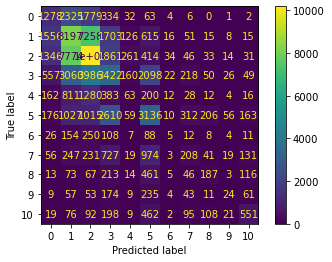

In [60]:
y_pred = forest.predict(X_test)
print(f'Accuracy : %.3f' % accuracy_score(y_test, y_pred))
print(f'Score : %.4f' % score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [61]:
kf = KFold(5, shuffle=True)
fold = 1

for train_index, validate_index in kf.split(X,y):
    forest.fit(X[train_index], y[train_index])
    ytest = y[validate_index]
    y_pred = forest.predict(X[validate_index])
    print(f'Accuracy : %.4f' % accuracy_score(ytest, y_pred))
    print(f'Score : %.4f' % score(ytest, y_pred))

Accuracy : 0.3410
Score : 0.8706
Accuracy : 0.3419
Score : 0.8718
Accuracy : 0.3407
Score : 0.8717
Accuracy : 0.3420
Score : 0.8720
Accuracy : 0.3397
Score : 0.8717


In [69]:
accuracy_data = []
score_data = []

for i in range(1,128):
    forest = RandomForestClassifier(n_estimators=i, criterion='entropy')
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    score = 1-np.mean(np.abs(y_test-y_pred))/K
    print(f'Accuracy {i} estimators : %.4f' % accuracy)
    print(f'Score {i} estimators : %.4f' % score)
    accuracy_data.append(accuracy)
    score_data.append(score)
    
    

Accuracy 1 estimators : 0.2802
Score 1 estimators : 0.8446
Accuracy 2 estimators : 0.2922
Score 2 estimators : 0.8535
Accuracy 3 estimators : 0.3032
Score 3 estimators : 0.8568
Accuracy 4 estimators : 0.3108
Score 4 estimators : 0.8585
Accuracy 5 estimators : 0.3221
Score 5 estimators : 0.8636
Accuracy 6 estimators : 0.3245
Score 6 estimators : 0.8650
Accuracy 7 estimators : 0.3316
Score 7 estimators : 0.8682
Accuracy 8 estimators : 0.3365
Score 8 estimators : 0.8696
Accuracy 9 estimators : 0.3387
Score 9 estimators : 0.8707
Accuracy 10 estimators : 0.3418
Score 10 estimators : 0.8714
Accuracy 11 estimators : 0.3445
Score 11 estimators : 0.8725
Accuracy 12 estimators : 0.3452
Score 12 estimators : 0.8731
Accuracy 13 estimators : 0.3488
Score 13 estimators : 0.8745
Accuracy 14 estimators : 0.3490
Score 14 estimators : 0.8745
Accuracy 15 estimators : 0.3509
Score 15 estimators : 0.8748
Accuracy 16 estimators : 0.3531
Score 16 estimators : 0.8757
Accuracy 17 estimators : 0.3545
Score 17 e

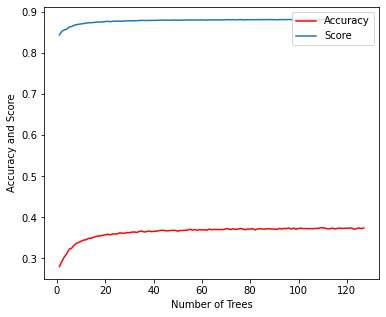

In [75]:
nums = np.arange(1,128)
fig = plt.figure(figsize=(6,5))
plt.plot(nums, accuracy_data, c='r', label='Accuracy')
plt.plot(nums, score_data, label='Score')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy and Score')
plt.legend(loc='upper right')
plt.show()

Accuracy : 0.374
Score : 0.88


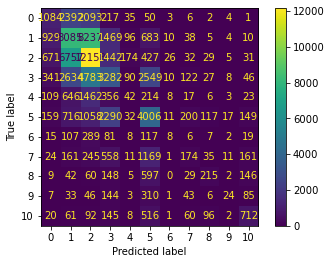

In [78]:
y_pred = forest.predict(X_test)
print(f'Accuracy : %.3f' % accuracy_score(y_test, y_pred))
score = 1-np.mean(np.abs(y_test-y_pred))/K
print(f'Score : %.2f' % score)


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm )
disp.plot()
plt.show();

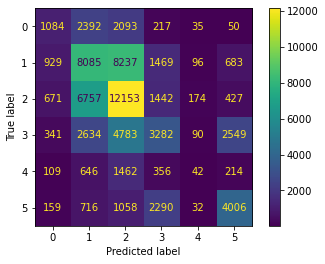

In [79]:
cm_reduced = cm[:6,:6]

cm = confusion_matrix(y_test, y_pred);
disp = ConfusionMatrixDisplay(cm_reduced)
disp.plot();

# Naive Bayes

In [137]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB(var_smoothing=1.1)
model.fit(X_test, y_test)


GaussianNB(var_smoothing=1.1)

Accuracy : 0.311
Score : 0.8517


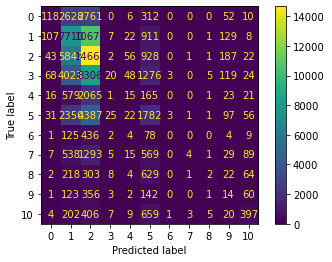

In [138]:
y_pred = model.predict(X_test)
print(f'Accuracy : %.3f' % accuracy_score(y_test, y_pred))
score = 1-np.mean(np.abs(y_test-y_pred))/K
print(f'Score : %.4f' % score)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

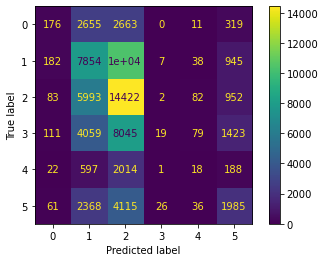

In [92]:
cm_reduced = cm[:6,:6]

cm = confusion_matrix(y_test, y_pred);
disp = ConfusionMatrixDisplay(cm_reduced)
disp.plot();

# Multinomial Naive Bayes

In [83]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_test, y_test)


ValueError: Negative values in data passed to MultinomialNB (input X)

In [ ]:
y_pred = model.predict(X_test)
print(f'Accuracy : %.3f' % accuracy_score(y_test, y_pred))
print(f'Score : %.4f' % score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

# Gradient Boost Classifier

In [11]:
from sklearn.ensemble import GradientBoostingClassifier

In [12]:
model = GradientBoostingClassifier()



In [13]:
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [14]:
y_pred = model.predict(X_test)
print(f'Accuracy : %.3f' % accuracy_score(y_test, y_pred))
score = 1-np.mean(np.abs(y_test-y_pred))/K
print(f'Score : %.4f' % score)

Accuracy : 0.399
Score : 0.8902


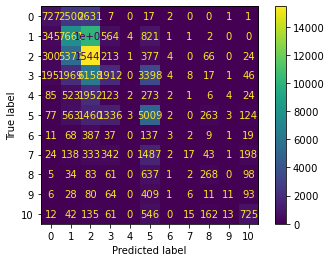

In [15]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

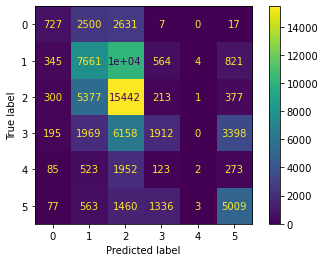

In [16]:
cm_reduced = cm[:6,:6]

cm = confusion_matrix(y_test, y_pred);
disp = ConfusionMatrixDisplay(cm_reduced)
disp.plot();

# Cat Boost Classifier

In [11]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier(iterations=1000)


In [12]:
cb.fit(X_train, y_train)

Learning rate set to 0.104618
0:	learn: 2.2281804	total: 186ms	remaining: 3m 5s
1:	learn: 2.1106214	total: 289ms	remaining: 2m 23s
2:	learn: 2.0240458	total: 387ms	remaining: 2m 8s
3:	learn: 1.9573139	total: 492ms	remaining: 2m 2s
4:	learn: 1.9018771	total: 594ms	remaining: 1m 58s
5:	learn: 1.8585645	total: 698ms	remaining: 1m 55s
6:	learn: 1.8194924	total: 795ms	remaining: 1m 52s
7:	learn: 1.7890137	total: 895ms	remaining: 1m 51s
8:	learn: 1.7610009	total: 1s	remaining: 1m 50s
9:	learn: 1.7387758	total: 1.1s	remaining: 1m 49s
10:	learn: 1.7192381	total: 1.2s	remaining: 1m 48s
11:	learn: 1.7006638	total: 1.31s	remaining: 1m 47s
12:	learn: 1.6852619	total: 1.41s	remaining: 1m 47s
13:	learn: 1.6714734	total: 1.5s	remaining: 1m 46s
14:	learn: 1.6594712	total: 1.61s	remaining: 1m 45s
15:	learn: 1.6491984	total: 1.72s	remaining: 1m 45s
16:	learn: 1.6416239	total: 1.82s	remaining: 1m 45s
17:	learn: 1.6336271	total: 1.93s	remaining: 1m 45s
18:	learn: 1.6275935	total: 2.03s	remaining: 1m 44s
1

158:	learn: 1.5241535	total: 18s	remaining: 1m 34s
159:	learn: 1.5239950	total: 18.1s	remaining: 1m 34s
160:	learn: 1.5237860	total: 18.2s	remaining: 1m 34s
161:	learn: 1.5235627	total: 18.3s	remaining: 1m 34s
162:	learn: 1.5233521	total: 18.4s	remaining: 1m 34s
163:	learn: 1.5232005	total: 18.5s	remaining: 1m 34s
164:	learn: 1.5230866	total: 18.7s	remaining: 1m 34s
165:	learn: 1.5228954	total: 18.8s	remaining: 1m 34s
166:	learn: 1.5225361	total: 18.9s	remaining: 1m 34s
167:	learn: 1.5223646	total: 19s	remaining: 1m 34s
168:	learn: 1.5221833	total: 19.1s	remaining: 1m 34s
169:	learn: 1.5217444	total: 19.2s	remaining: 1m 33s
170:	learn: 1.5215322	total: 19.3s	remaining: 1m 33s
171:	learn: 1.5214248	total: 19.5s	remaining: 1m 33s
172:	learn: 1.5211512	total: 19.6s	remaining: 1m 33s
173:	learn: 1.5209529	total: 19.7s	remaining: 1m 33s
174:	learn: 1.5205206	total: 19.8s	remaining: 1m 33s
175:	learn: 1.5203199	total: 19.9s	remaining: 1m 33s
176:	learn: 1.5201011	total: 20.1s	remaining: 1m 3

314:	learn: 1.5000258	total: 36.2s	remaining: 1m 18s
315:	learn: 1.4997657	total: 36.3s	remaining: 1m 18s
316:	learn: 1.4995338	total: 36.4s	remaining: 1m 18s
317:	learn: 1.4993697	total: 36.5s	remaining: 1m 18s
318:	learn: 1.4992516	total: 36.6s	remaining: 1m 18s
319:	learn: 1.4991319	total: 36.7s	remaining: 1m 18s
320:	learn: 1.4989903	total: 36.9s	remaining: 1m 17s
321:	learn: 1.4987823	total: 37s	remaining: 1m 17s
322:	learn: 1.4986389	total: 37.1s	remaining: 1m 17s
323:	learn: 1.4985015	total: 37.2s	remaining: 1m 17s
324:	learn: 1.4983696	total: 37.3s	remaining: 1m 17s
325:	learn: 1.4982742	total: 37.4s	remaining: 1m 17s
326:	learn: 1.4980510	total: 37.5s	remaining: 1m 17s
327:	learn: 1.4978996	total: 37.7s	remaining: 1m 17s
328:	learn: 1.4977673	total: 37.8s	remaining: 1m 17s
329:	learn: 1.4975890	total: 37.9s	remaining: 1m 16s
330:	learn: 1.4975428	total: 38s	remaining: 1m 16s
331:	learn: 1.4974102	total: 38.1s	remaining: 1m 16s
332:	learn: 1.4972245	total: 38.2s	remaining: 1m 1

472:	learn: 1.4812567	total: 56.4s	remaining: 1m 2s
473:	learn: 1.4811703	total: 56.5s	remaining: 1m 2s
474:	learn: 1.4810834	total: 56.7s	remaining: 1m 2s
475:	learn: 1.4809736	total: 56.8s	remaining: 1m 2s
476:	learn: 1.4808765	total: 56.9s	remaining: 1m 2s
477:	learn: 1.4807734	total: 57s	remaining: 1m 2s
478:	learn: 1.4806303	total: 57.2s	remaining: 1m 2s
479:	learn: 1.4805210	total: 57.3s	remaining: 1m 2s
480:	learn: 1.4803742	total: 57.4s	remaining: 1m 1s
481:	learn: 1.4803041	total: 57.6s	remaining: 1m 1s
482:	learn: 1.4801762	total: 57.7s	remaining: 1m 1s
483:	learn: 1.4800938	total: 57.9s	remaining: 1m 1s
484:	learn: 1.4799697	total: 58s	remaining: 1m 1s
485:	learn: 1.4798450	total: 58.1s	remaining: 1m 1s
486:	learn: 1.4797627	total: 58.3s	remaining: 1m 1s
487:	learn: 1.4796391	total: 58.4s	remaining: 1m 1s
488:	learn: 1.4795281	total: 58.5s	remaining: 1m 1s
489:	learn: 1.4794151	total: 58.6s	remaining: 1m 1s
490:	learn: 1.4793139	total: 58.7s	remaining: 1m
491:	learn: 1.47919

632:	learn: 1.4650644	total: 1m 17s	remaining: 45s
633:	learn: 1.4648891	total: 1m 17s	remaining: 44.9s
634:	learn: 1.4647630	total: 1m 17s	remaining: 44.8s
635:	learn: 1.4646168	total: 1m 17s	remaining: 44.6s
636:	learn: 1.4644918	total: 1m 18s	remaining: 44.5s
637:	learn: 1.4644039	total: 1m 18s	remaining: 44.4s
638:	learn: 1.4643150	total: 1m 18s	remaining: 44.3s
639:	learn: 1.4642019	total: 1m 18s	remaining: 44.2s
640:	learn: 1.4640987	total: 1m 18s	remaining: 44.1s
641:	learn: 1.4639867	total: 1m 18s	remaining: 44s
642:	learn: 1.4638619	total: 1m 18s	remaining: 43.8s
643:	learn: 1.4637823	total: 1m 19s	remaining: 43.7s
644:	learn: 1.4636938	total: 1m 19s	remaining: 43.6s
645:	learn: 1.4635636	total: 1m 19s	remaining: 43.5s
646:	learn: 1.4634891	total: 1m 19s	remaining: 43.4s
647:	learn: 1.4634050	total: 1m 19s	remaining: 43.3s
648:	learn: 1.4633555	total: 1m 19s	remaining: 43.2s
649:	learn: 1.4632678	total: 1m 20s	remaining: 43.1s
650:	learn: 1.4631743	total: 1m 20s	remaining: 43s

788:	learn: 1.4507163	total: 1m 40s	remaining: 26.8s
789:	learn: 1.4506223	total: 1m 40s	remaining: 26.7s
790:	learn: 1.4505671	total: 1m 40s	remaining: 26.6s
791:	learn: 1.4505036	total: 1m 40s	remaining: 26.5s
792:	learn: 1.4503086	total: 1m 40s	remaining: 26.3s
793:	learn: 1.4502263	total: 1m 41s	remaining: 26.2s
794:	learn: 1.4501337	total: 1m 41s	remaining: 26.1s
795:	learn: 1.4500430	total: 1m 41s	remaining: 26s
796:	learn: 1.4499459	total: 1m 41s	remaining: 25.8s
797:	learn: 1.4498297	total: 1m 41s	remaining: 25.7s
798:	learn: 1.4497238	total: 1m 41s	remaining: 25.6s
799:	learn: 1.4496186	total: 1m 41s	remaining: 25.5s
800:	learn: 1.4495261	total: 1m 42s	remaining: 25.4s
801:	learn: 1.4494289	total: 1m 42s	remaining: 25.2s
802:	learn: 1.4493218	total: 1m 42s	remaining: 25.1s
803:	learn: 1.4492562	total: 1m 42s	remaining: 25s
804:	learn: 1.4491776	total: 1m 42s	remaining: 24.9s
805:	learn: 1.4491145	total: 1m 42s	remaining: 24.7s
806:	learn: 1.4490168	total: 1m 42s	remaining: 24.

946:	learn: 1.4371249	total: 2m 3s	remaining: 6.91s
947:	learn: 1.4370200	total: 2m 3s	remaining: 6.78s
948:	learn: 1.4369368	total: 2m 3s	remaining: 6.65s
949:	learn: 1.4368511	total: 2m 3s	remaining: 6.52s
950:	learn: 1.4367581	total: 2m 4s	remaining: 6.39s
951:	learn: 1.4366502	total: 2m 4s	remaining: 6.26s
952:	learn: 1.4365704	total: 2m 4s	remaining: 6.13s
953:	learn: 1.4364903	total: 2m 4s	remaining: 6s
954:	learn: 1.4364226	total: 2m 4s	remaining: 5.87s
955:	learn: 1.4363335	total: 2m 4s	remaining: 5.74s
956:	learn: 1.4362444	total: 2m 4s	remaining: 5.61s
957:	learn: 1.4361987	total: 2m 5s	remaining: 5.48s
958:	learn: 1.4361107	total: 2m 5s	remaining: 5.35s
959:	learn: 1.4360661	total: 2m 5s	remaining: 5.22s
960:	learn: 1.4359471	total: 2m 5s	remaining: 5.09s
961:	learn: 1.4358689	total: 2m 5s	remaining: 4.96s
962:	learn: 1.4358099	total: 2m 5s	remaining: 4.83s
963:	learn: 1.4357459	total: 2m 5s	remaining: 4.7s
964:	learn: 1.4356328	total: 2m 6s	remaining: 4.57s
965:	learn: 1.43

In [13]:
y_pred = cb.predict(X_test)
print(f'Accuracy : %.3f' % accuracy_score(y_test, y_pred))


Accuracy : 0.408


In [16]:
y_pred = y_pred.flatten()

In [17]:
y_pred.shape

(79610,)

In [18]:
z = np.abs(y_test-y_pred)

In [19]:
s = np.mean(z)

In [20]:
s = 1-s/K

In [21]:
print(f'Score : %.4f' % s)

Score : 0.8919


In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [ ]:
cm_reduced = cm[:6,:6]

cm = confusion_matrix(y_test, y_pred);
disp = ConfusionMatrixDisplay(cm_reduced)
disp.plot();

# XGB BOOST

In [18]:
from xgboost import XGBClassifier

In [19]:
xgb = XGBClassifier()

In [20]:
xgb.fit(X_train, y_train)

/Users/baraa/opt/anaconda3/envs/tf/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:33:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [21]:
y_pred = xgb.predict(X_test)
print(f'Accuracy : %.3f' % accuracy_score(y_test, y_pred))
score = 1-np.mean(np.abs(y_test-y_pred))/K
print(f'Score : %.4f' % score)

Accuracy : 0.404
Score : 0.8906


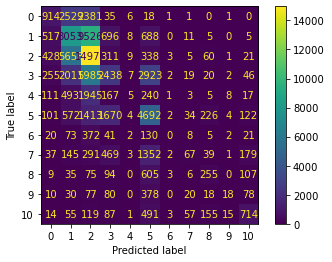

In [22]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

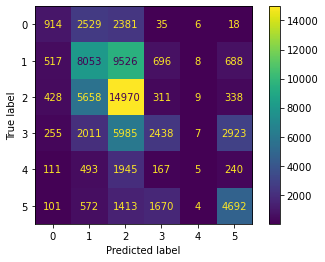

In [23]:
cm_reduced = cm[:6,:6]

cm = confusion_matrix(y_test, y_pred);
disp = ConfusionMatrixDisplay(cm_reduced)
disp.plot();